<a href="https://colab.research.google.com/github/huytuan3108/bai_tap_fuzzy/blob/main/b1_of_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.2 MB/s eta 0:00:00


giá xe: 1.7459546925566343
điểm thưởng: 1.4971685971685973


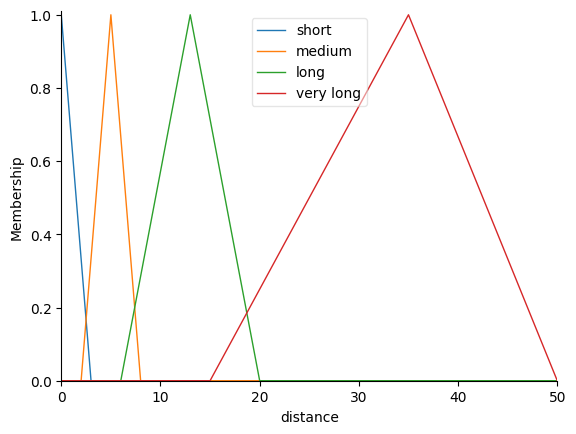

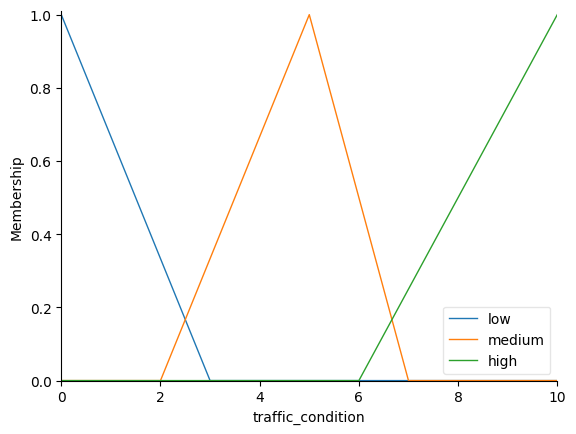

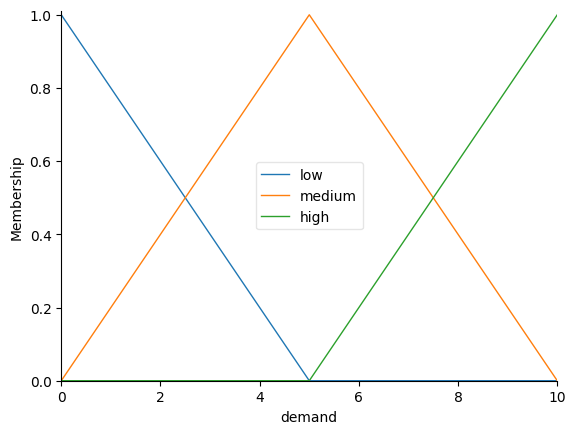

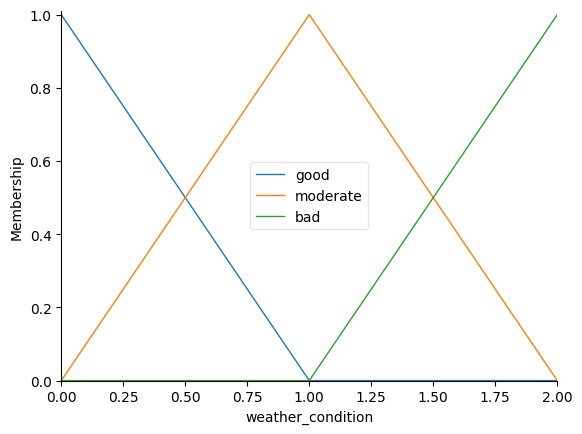

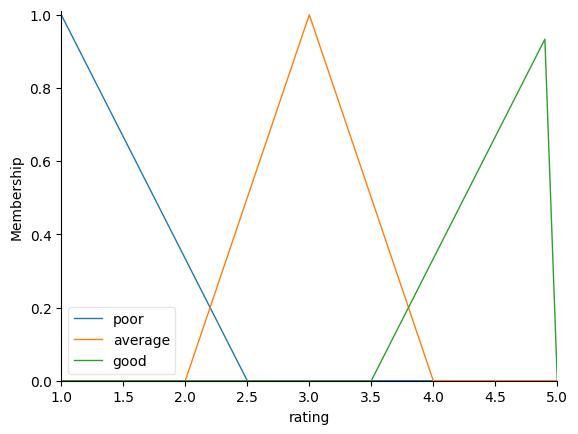

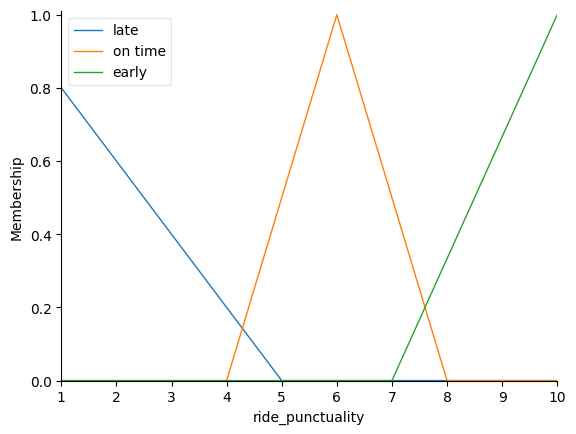

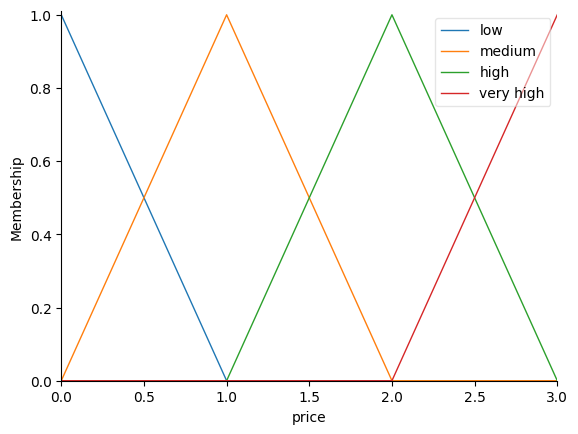

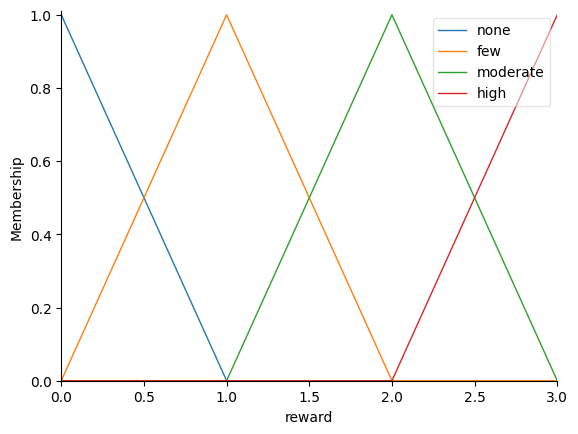

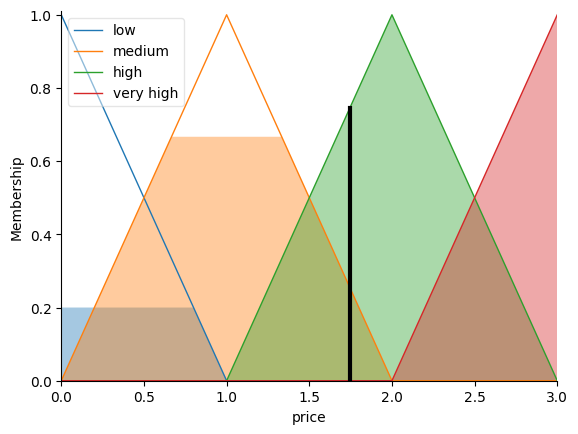

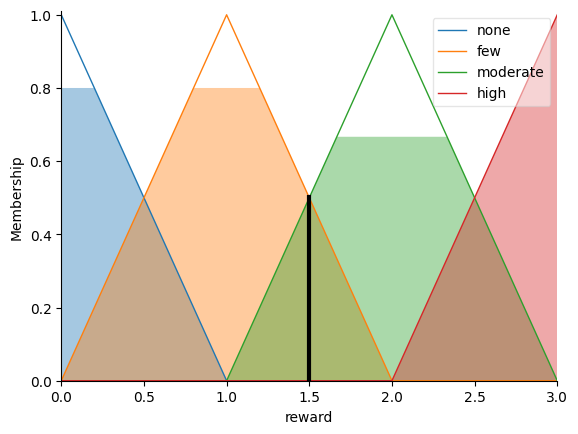

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
distance=ctrl.Antecedent(np.arange(0,50.1,1), 'distance')
traffic_condition=ctrl.Antecedent(np.arange(0,10.1,1),'traffic_condition')
demand=ctrl.Antecedent(np.arange(0,10.1,1), 'demand')
weather_condition=ctrl.Antecedent(np.arange(0,2.1,1), 'weather_condition')
rating=ctrl.Antecedent(np.arange(1,5.1,0.1), 'rating')
ride_punctuality=ctrl.Antecedent(np.arange(1,10.1,1), 'ride_punctuality')
price=ctrl.Consequent(np.arange(0,3.1,1), 'price')
reward=ctrl.Consequent(np.arange(0,3.1,1), 'reward')
distance['short']=fuzz.trimf(distance.universe, [0,0,3])
distance['medium']=fuzz.trimf(distance.universe, [2,5,8])
distance['long']=fuzz.trimf(distance.universe, [6,13,20])
distance['very long']=fuzz.trimf(distance.universe, [15,35,50])
distance.view()
traffic_condition['low']=fuzz.trimf(traffic_condition.universe, [0,0,3])
traffic_condition['medium']=fuzz.trimf(traffic_condition.universe, [2,5,7])
traffic_condition['high']=fuzz.trimf(traffic_condition.universe, [6,10,10])
traffic_condition.view()
demand['low']=fuzz.trimf(demand.universe, [0,0,5])
demand['medium']=fuzz.trimf(demand.universe, [0,5,10])
demand['high']=fuzz.trimf(demand.universe, [5,10,10])
demand.view()
weather_condition['good']=fuzz.trimf(weather_condition.universe, [0,0,1])
weather_condition['moderate']=fuzz.trimf(weather_condition.universe, [0,1,2])
weather_condition['bad']=fuzz.trimf(weather_condition.universe, [1,2,2])
weather_condition.view()
rating['poor']=fuzz.trimf(rating.universe, [1,1,2.5])
rating['average']=fuzz.trimf(rating.universe, [2,3,4])
rating['good']=fuzz.trimf(rating.universe, [3.5,5,5])
rating.view()
ride_punctuality['late']=fuzz.trimf(ride_punctuality.universe, [0,0,5])
ride_punctuality['on time']=fuzz.trimf(ride_punctuality.universe, [4,6,8])
ride_punctuality['early']=fuzz.trimf(ride_punctuality.universe, [7,10,10])
ride_punctuality.view()
price['low']=fuzz.trimf(price.universe, [0,0,1])
price['medium']=fuzz.trimf(price.universe, [0,1,2])
price['high']=fuzz.trimf(price.universe, [1,2,3])
price['very high']=fuzz.trimf(price.universe, [2,3,3])
price.view()
reward['none']=fuzz.trimf(reward.universe, [0,0,1])
reward['few']=fuzz.trimf(reward.universe, [0,1,2])
reward['moderate']=fuzz.trimf(reward.universe, [1,2,3])
reward['high']=fuzz.trimf(reward.universe, [2,3,3])
reward.view()
rule1=ctrl.Rule(distance['short'] | traffic_condition['low'] | demand['low'], price['low'])
rule2=ctrl.Rule(distance['short'] | traffic_condition['medium'] | demand['high'], price['medium'])
rule3=ctrl.Rule(distance['medium'] | traffic_condition['high'] | demand['high'], price['high'])
rule4=ctrl.Rule(distance['long'] | traffic_condition['medium'] | weather_condition['good'], price['medium'])
rule5=ctrl.Rule(distance['long'] | traffic_condition['high'] | weather_condition['bad'], price['high'])
rule6=ctrl.Rule(distance['very long'] | traffic_condition['high'] | demand['high'], price['very high'])
rule7=ctrl.Rule(distance['medium'] | traffic_condition['low'] | demand['low'], price['medium'])
rule8=ctrl.Rule(distance['short'] | traffic_condition['high'] | weather_condition['bad'], price['high'])
rule9=ctrl.Rule(distance['very long'] | weather_condition['bad'], price['very high'])
rule10=ctrl.Rule(distance['medium'] | traffic_condition['medium'] | weather_condition['moderate'], price['medium'])
rule11=ctrl.Rule(rating['good'] | ride_punctuality['early'], reward['high'])
rule12=ctrl.Rule(rating['average'] | ride_punctuality['on time'], reward['moderate'])
rule13=ctrl.Rule(rating['poor'] | ride_punctuality['late'], reward['none'])
rule14=ctrl.Rule(distance['long'] | traffic_condition['high'] | ride_punctuality['on time'], reward['high'])
rule15=ctrl.Rule(distance['medium'] | traffic_condition['medium'] | rating['good'], reward['moderate'])
rule16=ctrl.Rule(rating['poor'] | ride_punctuality['late'], reward['none'])
rule17=ctrl.Rule(distance['very long'] | weather_condition['bad'] | rating['good'], reward['high'])
rule18=ctrl.Rule(distance['short'] | ride_punctuality['on time'] | rating['average'], reward['few'])
rule19=ctrl.Rule(distance['long'] | traffic_condition['high'] | ride_punctuality['late'], reward['few'])
rule20=ctrl.Rule(distance['medium'] | weather_condition['moderate'] | rating['good'], reward['moderate'])
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['distance']=18
fuzzy_system.input['traffic_condition']=4
fuzzy_system.input['demand']=4
fuzzy_system.input['weather_condition']=2
fuzzy_system.input['rating']=4
fuzzy_system.input['ride_punctuality']=1

fuzzy_system.compute()
print("giá xe:", fuzzy_system.output['price'])
print("điểm thưởng:", fuzzy_system.output['reward'])
price.view(sim=fuzzy_system)
reward.view(sim=fuzzy_system)
